<a href="https://colab.research.google.com/github/kengustafson/DeepDive-DataScience/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression to Predict Housing Sale Price**

**Deep Dive Data Science Project 2**

---
Ken Gustafson 3/3/2021

## Problem Definition

We desire to predict home sale prices based on various features of the property.

Output to be produced: Predicted sale price, in US dollars.

Additional goal: Attempt to determine a minimal set of features.

## Supporting Functions

In [ ]:
def root_mean_squared_percentage_error(y_true, y_pred):
    """Signature(y_true, y_pred). Returns float representing RMSE in percent."""
    rmspe = np.sqrt(np.mean(np.square((y_true-y_pred)/y_true)))*100
    return rmspe

## Data Collection

In [ ]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as model_selection
from sklearn import metrics

from IPython.display import Image

from sklearn.linear_model import Ridge

In [ ]:
# The data were sourced from the instructor.  It contains information related to home sale transactions.
# File Path Settings

file_name = '/content/drive/MyDrive/Data Science Student Material/Project 2 - Cohort 4/Data/Housing Data.csv'

train = pd.read_csv(file_name)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
print(train.head())
print(train.shape)

         PID  MS SubClass MS Zoning  ...  Sale Type  Sale Condition SalePrice
0  905101070           20        RL  ...        WD           Normal    115400
1  905101330           90        RL  ...        WD           Normal     90000
2  903454090           50        RM  ...        WD           Normal    141000
3  533244030           60        FV  ...        WD           Normal    254000
4  909252020           70        RL  ...        WD           Normal    155000

[5 rows x 81 columns]
(2637, 81)


## Data Cleaning



In [ ]:
# Drop spurious columns

train_clean = train.copy()

train_clean.drop('PID', axis=1, inplace=True)

train_clean.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,3,1964,1964,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,513.0,LwQ,144.0,348.0,1005.0,GasA,TA,Y,SBrkr,1005,0,0,1005,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1964.0,Unf,2.0,440.0,TA,TA,N,0,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1296,0,0,1296,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2.0,516.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,TA,Y,SBrkr,780,595,0,1375,0.0,0.0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,1979.0,Unf,1.0,544.0,TA,TA,P,0,162,0,0,126,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,484.0,Unf,0.0,491.0,975.0,GasA,Ex,Y,SBrkr,975,873,0,1848,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2000.0,RFn,2.0,592.0,TA,TA,Y,280,184,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,7,9,1936,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,Gd,Gd,No,ALQ,350.0,BLQ,210.0,0.0,560.0,GasA,Ex,Y,SBrkr,575,560,0,1135,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1971.0,RFn,2.0,576.0,TA,TA,Y,256,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
# MS_SubClass is coded as an integer, but really represents different categories,
# so change to String type

train_clean['MS SubClass'] = train_clean['MS SubClass'].apply(str)

#train_clean.info()

In [ ]:
# Replace 'Lot Frontage' NAs with zero (0.0)

train_clean['Lot Frontage'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Alley' NAs with 'No_Alley'

train_clean['Alley'].fillna(value='No_Alley', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Mas Vnr Type' NAs with 'No_Vnr'

train_clean['Mas Vnr Type'].fillna(value='No_Vnr', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Mas Vnr Area' NAs with 0.0

train_clean['Mas Vnr Area'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Bsmt Qual' NAs with 'No_Bsmt'

train_clean['Bsmt Qual'].fillna(value='No_Bsmt', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Bsmt Cond' NAs with 'No_Bsmt'

train_clean['Bsmt Cond'].fillna(value='No_Bsmt', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Bsmt Exposure' NAs with 'No_Bsmt'

train_clean['Bsmt Exposure'].fillna(value='No_Bsmt', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'BsmtFin Type 1' NAs with 'No_Bsmt'

train_clean['BsmtFin Type 1'].fillna(value='No_Bsmt', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'BsmtFin SF 1' NAs with 0.0

train_clean['BsmtFin SF 1'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'BsmtFin Type 2' NAs with 'No_Bsmt'

train_clean['BsmtFin Type 2'].fillna(value='No_Bsmt', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'BsmtFin SF 2' NAs with 0.0

train_clean['BsmtFin SF 2'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Bsmt Unf SF' NAs with 0.0

train_clean['Bsmt Unf SF'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Total Bsmt SF' NAs with 0.0

train_clean['Total Bsmt SF'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Bsmt Full Bath' NAs with 0.0

train_clean['Bsmt Full Bath'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Bsmt Half Bath' NAs with 0.0

train_clean['Bsmt Half Bath'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Fireplace Qu' NAs with 'No_FirePl'

train_clean['Fireplace Qu'].fillna(value='No_FirePl', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Garage Type' NAs with 'No_Garage'

train_clean['Garage Type'].fillna(value='No_Garage', inplace=True)

#train_clean.info()

In [ ]:
# Decision made to drop 'Garage Yr Blt' column
# due to low correlation and no intuitive NA replacement.

train_clean.drop('Garage Yr Blt', axis=1, inplace=True)

train_clean.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,62.0,14299,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,3,1964,1964,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,513.0,LwQ,144.0,348.0,1005.0,GasA,TA,Y,SBrkr,1005,0,0,1005,1.0,0.0,1,0,3,1,TA,5,Typ,0,No_FirePl,Detchd,Unf,2.0,440.0,TA,TA,N,0,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,90,RL,72.0,10791,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,No_Bsmt,No_Bsmt,No_Bsmt,No_Bsmt,0.0,No_Bsmt,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1296,0,0,1296,0.0,0.0,2,0,2,2,TA,6,Typ,0,No_FirePl,CarPort,Unf,2.0,516.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,50,RM,50.0,9000,Pave,No_Alley,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,TA,Y,SBrkr,780,595,0,1375,0.0,0.0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,Unf,1.0,544.0,TA,TA,P,0,162,0,0,126,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,60,FV,68.0,7379,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,484.0,Unf,0.0,491.0,975.0,GasA,Ex,Y,SBrkr,975,873,0,1848,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,RFn,2.0,592.0,TA,TA,Y,280,184,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,70,RL,60.0,7200,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,7,9,1936,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,Gd,Gd,No,ALQ,350.0,BLQ,210.0,0.0,560.0,GasA,Ex,Y,SBrkr,575,560,0,1135,1.0,0.0,1,0,3,1,Gd,6,Typ,0,No_FirePl,Detchd,RFn,2.0,576.0,TA,TA,Y,256,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
# Replace 'Garage Finish' NAs with 'No_Garage'

train_clean['Garage Finish'].fillna(value='No_Garage', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Garage Cars' NAs with 0.0

train_clean['Garage Cars'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Garage Area' NAs with 0.0

train_clean['Garage Area'].fillna(value=0.0, inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Garage Qual' NAs with 'No_Garage'

train_clean['Garage Qual'].fillna(value='No_Garage', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Garage Cond' NAs with 'No_Garage'

train_clean['Garage Cond'].fillna(value='No_Garage', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Pool QC' NAs with 'No_Pool'

train_clean['Pool QC'].fillna(value='No_Pool', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Fence' NAs with 'No_Fence'

train_clean['Fence'].fillna(value='No_Fence', inplace=True)

#train_clean.info()

In [ ]:
# Replace 'Misc Feature' NAs with 'No_Misc'

train_clean['Misc Feature'].fillna(value='No_Misc', inplace=True)

#train_clean.info()

In [ ]:
# Removal of non-'Normal' 'Sale Condition' observations after EDA

train_clean = train_clean[train_clean['Sale Condition'] == 'Normal']

train_clean.shape  # Correct number of rows; 2637 - 471

(2166, 79)

In [ ]:
# Drop misc observations: 2001 - Basement incomplete; 162 - Garage Yr Blt inconsistent; 1555 - only Tennis Ct

train_clean = train_clean.drop([2001, 162, 1555], axis=0)

train_clean.shape

(2163, 79)

In [ ]:
train_clean = train_clean.reset_index(drop=True)

## Exploratory Data Analysis

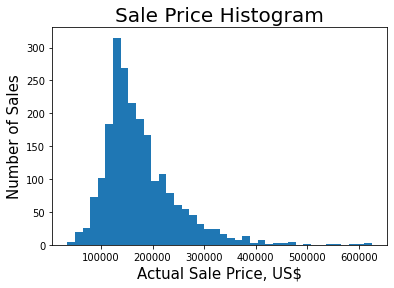

In [ ]:
# Examine SalePrice histogram

plt.hist(train_clean['SalePrice'], bins=40);
plt.title("Sale Price Histogram", size=20);
plt.xlabel("Actual Sale Price, US$", size=15)
plt.ylabel("Number of Sales", size=15);


In [ ]:
# Separate out numeric, non-numeric/object features

train_numeric = train_clean.select_dtypes(include=['int64', 'float64'])

train_object = train_clean.select_dtypes(include='object')

In [ ]:
numeric_feature_corr = train_numeric.corr()['SalePrice'].sort_values(ascending=False)[1:]

print(numeric_feature_corr.head())
print(numeric_feature_corr.tail(), '\n')

golden_features = numeric_feature_corr.abs().sort_values(ascending=False)
golden_features

Overall Qual     0.792308
Gr Liv Area      0.727615
Total Bsmt SF    0.634258
Garage Cars      0.629427
1st Flr SF       0.621814
Name: SalePrice, dtype: float64
Low Qual Fin SF   -0.021957
Bsmt Half Bath    -0.041968
Overall Cond      -0.086368
Kitchen AbvGr     -0.116725
Enclosed Porch    -0.127245
Name: SalePrice, dtype: float64 



Overall Qual       0.792308
Gr Liv Area        0.727615
Total Bsmt SF      0.634258
Garage Cars        0.629427
1st Flr SF         0.621814
Garage Area        0.619578
Full Bath          0.543261
Year Built         0.534684
Year Remod/Add     0.509164
TotRms AbvGrd      0.493734
Fireplaces         0.489028
Mas Vnr Area       0.483410
BsmtFin SF 1       0.447559
Wood Deck SF       0.340276
Open Porch SF      0.335349
Half Bath          0.292906
Bsmt Full Bath     0.291814
2nd Flr SF         0.287584
Lot Area           0.283183
Bedroom AbvGr      0.167979
Lot Frontage       0.159410
Bsmt Unf SF        0.147995
Enclosed Porch     0.127245
Kitchen AbvGr      0.116725
Screen Porch       0.110002
Overall Cond       0.086368
Bsmt Half Bath     0.041968
BsmtFin SF 2       0.039816
Pool Area          0.029270
Yr Sold            0.025596
Low Qual Fin SF    0.021957
Misc Val           0.019277
3Ssn Porch         0.018903
Mo Sold            0.009089
Name: SalePrice, dtype: float64

In [ ]:
import statsmodels.api as sm

actual_outcomes = train_numeric['SalePrice'].copy()

train_numeric_one_feature = pd.DataFrame(train_numeric[golden_features.index[0]].copy())

train_numeric_one_feature['Intercept'] = 1

train_numeric_one_feature

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Overall Qual,Intercept
0,4,1
1,4,1
2,6,1
3,8,1
4,7,1
...,...,...
2158,6,1
2159,7,1
2160,8,1
2161,6,1


In [ ]:
# Instantiate, fit, examine model results

model_one_feature = sm.OLS(actual_outcomes, train_numeric_one_feature).fit()

prediction_one_feature = model_one_feature.predict(train_numeric_one_feature)

print(model_one_feature.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3644.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:21   Log-Likelihood:                -26126.
No. Observations:                2163   AIC:                         5.226e+04
Df Residuals:                    2161   BIC:                         5.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Overall Qual  4.129e+04    684.047     60.368   

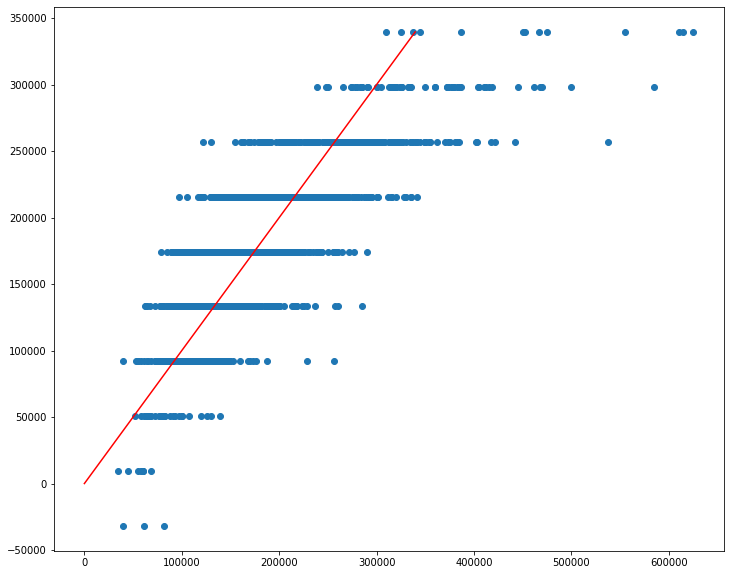

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(actual_outcomes, prediction_one_feature);
plt.plot([0, max(prediction_one_feature)], [0, max(prediction_one_feature)], c='red');

In [ ]:
# Try two features

train_numeric_two_features = pd.DataFrame(train_numeric[golden_features.index[:2]].copy())
train_numeric_two_features['Intercept'] = 1
train_numeric_two_features

,Overall Qual,Gr Liv Area,Intercept
0,4,1005,1
1,4,1296,1
2,6,1375,1
3,8,1848,1
4,7,1135,1
...,...,...,...
2158,6,1176,1
2159,7,1061,1
2160,8,1226,1
2161,6,1350,1


In [ ]:
model_two_features = sm.OLS(actual_outcomes, train_numeric_two_features).fit()
prediction_two_features = model_two_features.predict(train_numeric_two_features)
print(model_two_features.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     3269.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:10:21   Log-Likelihood:                -25688.
No. Observations:                2163   AIC:                         5.138e+04
Df Residuals:                    2160   BIC:                         5.140e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Overall Qual  2.933e+04    667.085     43.971   

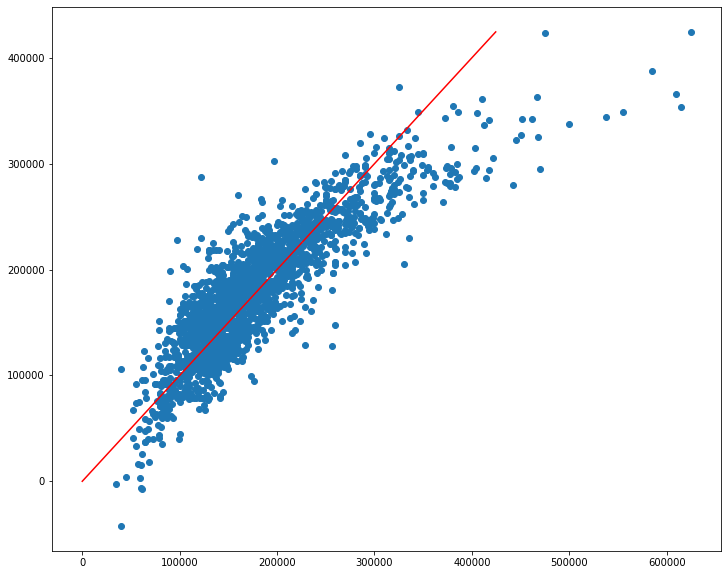

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(actual_outcomes, prediction_two_features);
plt.plot([0, max(prediction_two_features)], [0, max(prediction_two_features)], c='red');

In [ ]:
# We see some outliers, so we investigate

prediction_two_features[prediction_two_features>450000]

Series([], dtype: float64)

In [ ]:
#train_clean.iloc[1791,:]  # Sale Condition == Partial
#train_clean.iloc[1939,:]  # Sale Condition == Partial
#train_clean.iloc[2494,:]  # Sale Condition == Abnormal
train_clean[train_clean['Sale Condition'] != 'Normal']  # 471 observations; 17.9% of data

# Removal of non-Normal observations performed above


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [ ]:
model_all_features = sm.OLS(actual_outcomes, train_numeric[golden_features.index[:33]]).fit()
prediction_all_features = model_all_features.predict(train_numeric[golden_features.index[:33]])
print(model_all_features.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              4395.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):                        0.00
Time:                        16:10:21   Log-Likelihood:                         -24829.
No. Observations:                2163   AIC:                                  4.972e+04
Df Residuals:                    2132   BIC:                                  4.990e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

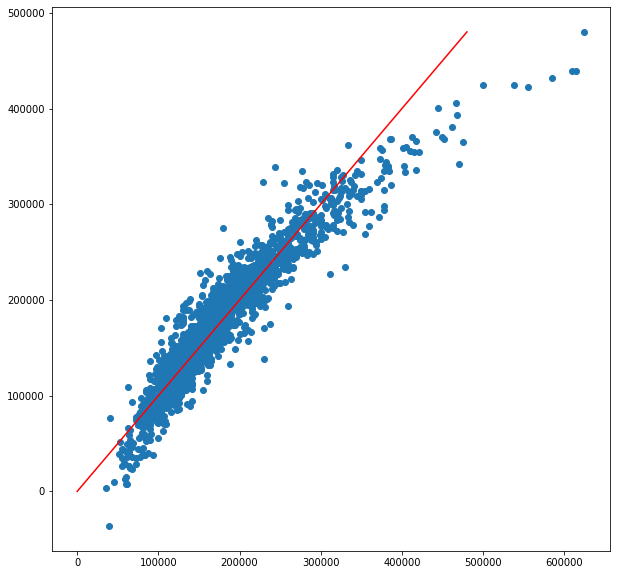

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(actual_outcomes, prediction_all_features);
plt.plot([0, max(prediction_all_features)], [0, max(prediction_all_features)], c='red');

In [ ]:
root_mean_squared_percentage_error(actual_outcomes, prediction_all_features)

15.27491333899662

## Data Processing

### Cross Validation

In [ ]:
# Run a split/fit to assess initial accuracy

X_train, X_test, y_train, y_test = model_selection.train_test_split(train_numeric[golden_features.index[:33]], actual_outcomes, test_size=0.20)

model_all_features_split = sm.OLS(y_train, X_train).fit()

prediction_all_features_split = model_all_features_split.predict(X_test)

root_mean_squared_percentage_error(y_test, prediction_all_features_split)

18.629486903633698

In [ ]:
# Run cross-validation over many iterations to assess average RMS%, stddev

numLoops = 100
results  = np.zeros(numLoops)
resArray = np.zeros((2,2))

for idx in range(numLoops):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(train_numeric[golden_features.index[:33]], actual_outcomes, test_size=0.20)
  model_all_features_split = sm.OLS(y_train, X_train).fit()
  prediction_all_features_split = model_all_features_split.predict(X_test)

  results[idx] =root_mean_squared_percentage_error(y_test, prediction_all_features_split)

print(results.mean())
print(results.std())

15.293904057168426
1.303298814440501


### Scale Numerical Features

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()  # RobustScaler underperformed

train_numeric_scaled = scaler.fit_transform(train_numeric)

train_numeric_scaled = pd.DataFrame(train_numeric_scaled, columns=train_numeric.columns)
train_numeric_scaled.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000
mean,0.176076,0.053066,0.557097,0.582293,0.706165,0.554092,0.060339,0.191307,0.036729,0.224458,0.329054,0.228840,0.186614,0.004086,0.327409,0.216135,0.030282,0.382686,0.192557,0.475805,0.346741,0.397554,0.150717,0.346093,0.309418,0.068371,0.077417,0.039369,0.005307,0.028065,0.001922,0.003722,0.465515,0.467638,0.237367
std,0.107457,0.042862,0.148918,0.141246,0.213600,0.339485,0.108916,0.181537,0.118082,0.176579,0.129493,0.104408,0.232328,0.042189,0.136726,0.256918,0.120257,0.135242,0.249931,0.135092,0.067059,0.138773,0.163070,0.145856,0.135135,0.092202,0.108895,0.104992,0.055372,0.098380,0.037148,0.033967,0.239372,0.323751,0.118395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.115016,0.037243,0.444444,0.500000,0.586957,0.250000,0.000000,0.000000,0.000000,0.089469,0.253394,0.153184,0.000000,0.000000,0.220453,0.000000,0.000000,0.250000,0.000000,0.333333,0.333333,0.272727,0.000000,0.200000,0.211694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.250000,0.160720
50%,0.191693,0.049363,0.555556,0.500000,0.717391,0.683333,0.000000,0.168269,0.000000,0.185788,0.313510,0.208262,0.000000,0.000000,0.314400,0.000000,0.000000,0.500000,0.000000,0.500000,0.333333,0.363636,0.250000,0.400000,0.316532,0.000000,0.042105,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.208475
75%,0.242812,0.061790,0.666667,0.625000,0.913043,0.866667,0.092812,0.313593,0.000000,0.329195,0.400776,0.289443,0.388064,0.000000,0.397877,0.500000,0.000000,0.500000,0.500000,0.500000,0.333333,0.454545,0.250000,0.400000,0.387097,0.117978,0.115789,0.000000,0.000000,0.000000,0.000000,0.000000,0.545455,0.750000,0.288136
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_numeric_scaled.shape

(2163, 35)

In [ ]:
train_numeric_scaled

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0.198083,0.079573,0.333333,0.250,0.666667,0.233333,0.00000,0.224213,0.094364,0.148973,0.324822,0.192484,0.000000,0.000000,0.192484,0.5,0.0,0.25,0.0,0.500000,0.333333,0.272727,0.00,0.4,0.295699,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000,0.545455,0.25,0.136271
1,0.230032,0.058099,0.333333,0.500,0.688406,0.283333,0.00000,0.000000,0.000000,0.000000,0.000000,0.275961,0.000000,0.000000,0.275961,0.0,0.0,0.50,0.0,0.333333,0.666667,0.363636,0.00,0.4,0.346774,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.040,0.818182,0.00,0.093220
2,0.159744,0.047135,0.555556,0.625,0.471014,0.000000,0.00000,0.000000,0.000000,0.333904,0.252101,0.127940,0.327283,0.000000,0.298623,0.0,0.0,0.25,0.5,0.500000,0.333333,0.363636,0.25,0.2,0.365591,0.000000,0.284211,0.0,0.0,0.21875,0.0,0.000,1.000000,0.25,0.179661
3,0.217252,0.037212,0.777778,0.500,0.927536,0.833333,0.00000,0.211538,0.000000,0.210188,0.315126,0.183878,0.480198,0.000000,0.434309,0.5,0.0,0.50,0.5,0.500000,0.333333,0.454545,0.25,0.4,0.397849,0.196629,0.322807,0.0,0.0,0.00000,0.0,0.000,0.272727,1.00,0.371186
4,0.191693,0.036117,0.666667,1.000,0.463768,0.950000,0.00000,0.152972,0.137615,0.000000,0.180995,0.069134,0.308031,0.000000,0.229776,0.5,0.0,0.25,0.0,0.500000,0.333333,0.363636,0.00,0.4,0.387097,0.179775,0.000000,0.0,0.0,0.00000,0.0,0.000,0.272727,0.75,0.203390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0.166134,0.030240,0.555556,0.625,0.449275,0.000000,0.00000,0.000000,0.000000,0.349315,0.263736,0.138267,0.000000,0.338346,0.241538,0.0,0.0,0.25,0.0,0.500000,0.333333,0.363636,0.25,0.4,0.354839,0.078652,0.000000,0.0,0.0,0.00000,0.0,0.032,0.727273,0.00,0.134746
2159,0.236422,0.058019,0.666667,0.625,0.855072,0.683333,0.00000,0.201049,0.187418,0.131849,0.340659,0.208548,0.000000,0.000000,0.208548,0.5,0.0,0.25,0.5,0.166667,0.333333,0.181818,0.00,0.4,0.310484,0.080056,0.063158,0.0,0.0,0.00000,0.0,0.000,0.545455,0.75,0.215254
2160,0.194888,0.015193,0.777778,0.500,0.789855,0.516667,0.00000,0.419580,0.000000,0.113870,0.396251,0.255881,0.000000,0.000000,0.255881,0.5,0.0,0.25,0.0,0.166667,0.333333,0.181818,0.50,0.4,0.325269,0.093399,0.136842,0.0,0.0,0.00000,0.0,0.000,0.727273,0.75,0.299153
2161,0.249201,0.054114,0.555556,0.500,0.739130,0.400000,0.10875,0.000000,0.000000,0.455479,0.343891,0.291452,0.000000,0.000000,0.291452,0.0,0.0,0.50,0.0,0.500000,0.333333,0.454545,0.25,0.4,0.321237,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000,0.636364,0.75,0.220339


### Categorical Features

In [ ]:
train_object['Neighborhood']

0        Sawyer
1        Sawyer
2        IDOTRR
3       Somerst
4         SWISU
         ...   
2158    BrkSide
2159    SawyerW
2160     Greens
2161     NWAmes
2162    Gilbert
Name: Neighborhood, Length: 2163, dtype: object

In [ ]:
# One-hot encode categorical features

train_one_hot = pd.get_dummies(train_object['Neighborhood'])

train_object['Neighborhood'].value_counts()

NAmes      355
CollgCr    206
OldTown    184
Edwards    135
Sawyer     124
Gilbert    116
NWAmes     102
Somerst     99
Mitchel     92
SawyerW     91
NridgHt     88
BrkSide     87
Crawfor     80
NoRidge     61
IDOTRR      59
Timber      44
SWISU       37
StoneBr     34
ClearCr     33
MeadowV     31
BrDale      25
Veenker     22
NPkVill     20
Blmngtn     17
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [ ]:
print(train_one_hot.shape)
train_one_hot

(2163, 28)


,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2160,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_numeric_one_hot = pd.concat([train_numeric_scaled, train_one_hot], axis=1)
train_numeric_one_hot.drop(['SalePrice'], axis=1, inplace=True)
train_numeric_one_hot['Intercept'] = 1

train_numeric_one_hot

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Intercept
0,0.198083,0.079573,0.333333,0.250,0.666667,0.233333,0.00000,0.224213,0.094364,0.148973,0.324822,0.192484,0.000000,0.000000,0.192484,0.5,0.0,0.25,0.0,0.500000,0.333333,0.272727,0.00,0.4,0.295699,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000,0.545455,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.230032,0.058099,0.333333,0.500,0.688406,0.283333,0.00000,0.000000,0.000000,0.000000,0.000000,0.275961,0.000000,0.000000,0.275961,0.0,0.0,0.50,0.0,0.333333,0.666667,0.363636,0.00,0.4,0.346774,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.040,0.818182,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.159744,0.047135,0.555556,0.625,0.471014,0.000000,0.00000,0.000000,0.000000,0.333904,0.252101,0.127940,0.327283,0.000000,0.298623,0.0,0.0,0.25,0.5,0.500000,0.333333,0.363636,0.25,0.2,0.365591,0.000000,0.284211,0.0,0.0,0.21875,0.0,0.000,1.000000,0.25,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.217252,0.037212,0.777778,0.500,0.927536,0.833333,0.00000,0.211538,0.000000,0.210188,0.315126,0.183878,0.480198,0.000000,0.434309,0.5,0.0,0.50,0.5,0.500000,0.333333,0.454545,0.25,0.4,0.397849,0.196629,0.322807,0.0,0.0,0.00000,0.0,0.000,0.272727,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.191693,0.036117,0.666667,1.000,0.463768,0.950000,0.00000,0.152972,0.137615,0.000000,0.180995,0.069134,0.308031,0.000000,0.229776,0.5,0.0,0.25,0.0,0.500000,0.333333,0.363636,0.00,0.4,0.387097,0.179775,0.000000,0.0,0.0,0.00000,0.0,0.000,0.272727,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0.166134,0.030240,0.555556,0.625,0.449275,0.000000,0.00000,0.000000,0.000000,0.349315,0.263736,0.138267,0.000000,0.338346,0.241538,0.0,0.0,0.25,0.0,0.500000,0.333333,0.363636,0.25,0.4,0.354839,0.078652,0.000000,0.0,0.0,0.00000,0.0,0.032,0.727273,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2159,0.236422,0.058019,0.666667,0.625,0.855072,0.683333,0.00000,0.201049,0.187418,0.131849,0.340659,0.208548,0.000000,0.000000,0.208548,0.5,0.0,0.25,0.5,0.166667,0.333333,0.181818,0.00,0.4,0.310484,0.080056,0.063158,0.0,0.0,0.00000,0.0,0.000,0.545455,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2160,0.194888,0.015193,0.777778,0.500,0.789855,0.516667,0.00000,0.419580,0.000000,0.113870,0.396251,0.255881,0.000000,0.000000,0.255881,0.5,0.0,0.25,0.0,0.166667,0.333333,0.181818,0.50,0.4,0.325269,0.093399,0.136842,0.0,0.0,0.00000,0.0,0.000,0.727273,0.75,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2161,0.249201,0.054114,0.555556,0.500,0.739130,0.400000,0.10875,0.000000,0.000000,0.455479,0.343891,0.291452,0.000000,0.000000,0.291452,0.0,0.0,0.50,0.0,0.500000,0.333333,0.454545,0.25,0.4,0.321237,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000,0.636364,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
model_one_hot = sm.OLS(actual_outcomes, train_numeric_one_hot).fit()

predict_one_hot = model_one_hot.predict(train_numeric_one_hot)

root_mean_squared_percentage_error(actual_outcomes, predict_one_hot)

13.288794855728364

In [ ]:
# Loop over all Categorical features to see most impactful

results = pd.DataFrame(index=['RMS%'])
train_numeric_scaled.drop(['SalePrice'], axis=1, inplace=True)
train_numeric_scaled['Intercept'] = 1

for feature in train_object.columns:
  train_one_hot = pd.get_dummies(train_object[feature])
  train_numeric_one_hot = pd.concat([train_numeric_scaled, train_one_hot], axis=1)
  model_one_hot = sm.OLS(actual_outcomes, train_numeric_one_hot).fit()
  predict_one_hot = model_one_hot.predict(train_numeric_one_hot)
  results[feature] = root_mean_squared_percentage_error(actual_outcomes, predict_one_hot)

results = results.sort_values(by='RMS%', axis=1)
results

,Neighborhood,Kitchen Qual,Bsmt Qual,Exter Qual,BsmtFin Type 1,MS SubClass,Bsmt Exposure,Foundation,Bsmt Cond,BsmtFin Type 2,Bldg Type,Garage Qual,Garage Type,Garage Cond,Garage Finish,Exterior 2nd,Exterior 1st,Electrical,House Style,Paved Drive,Central Air,Heating QC,Fireplace Qu,Mas Vnr Type,Condition 2,Lot Shape,MS Zoning,Condition 1,Pool QC,Functional,Land Contour,Heating,Sale Type,Land Slope,Lot Config,Exter Cond,Misc Feature,Fence,Roof Matl,Roof Style,Alley,Sale Condition,Utilities,Street
RMS%,13.288795,13.469697,13.552833,13.615719,14.347865,14.420842,14.430808,14.529626,14.556302,14.58155,14.650917,14.762378,14.765048,14.777398,14.778196,14.829131,14.829162,14.921797,14.969725,14.977527,14.997625,15.007524,15.038957,15.069125,15.103717,15.109201,15.11051,15.111411,15.113053,15.140798,15.15791,15.16542,15.167701,15.196287,15.208262,15.227521,15.22896,15.230619,15.242504,15.247788,15.259077,15.266518,15.274466,15.28767


Add top categorical features

In [ ]:
train_one_hot = pd.get_dummies(train_object[results.columns[:7]])
train_numeric_one_hot = pd.concat([train_numeric_scaled, train_one_hot], axis=1)
model_one_hot = sm.OLS(actual_outcomes, train_numeric_one_hot).fit()
predict_one_hot = model_one_hot.predict(train_numeric_one_hot)
root_mean_squared_percentage_error(actual_outcomes, predict_one_hot)

10.371404937251212

In [ ]:
# Run cross-validation over many iterations to assess average RMS%, stddev

numLoops = 100
results  = np.zeros(numLoops)
resArray = np.zeros((2,2))

for idx in range(numLoops):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(train_numeric_one_hot, actual_outcomes, test_size=0.20)
  model_all_features_split = sm.OLS(y_train, X_train).fit()
  prediction_all_features_split = model_all_features_split.predict(X_test)

  results[idx] =root_mean_squared_percentage_error(y_test, prediction_all_features_split)

print(results.mean())
print(results.std())

11.165483043264178
0.716631590709585


### Non-linear Transform

Attempt to make predictions more accurate by transforming outcomes via nonlinear (quadratic) function.

In [ ]:
degree = 0.3
nonlinear_outcomes = actual_outcomes.pow(degree)

model_one_hot = sm.OLS(nonlinear_outcomes, train_numeric_one_hot).fit()
predict_one_hot = model_one_hot.predict(train_numeric_one_hot)

real_predicted_outcomes = predict_one_hot.pow(1/degree)

root_mean_squared_percentage_error(actual_outcomes, real_predicted_outcomes)


9.264719509893832

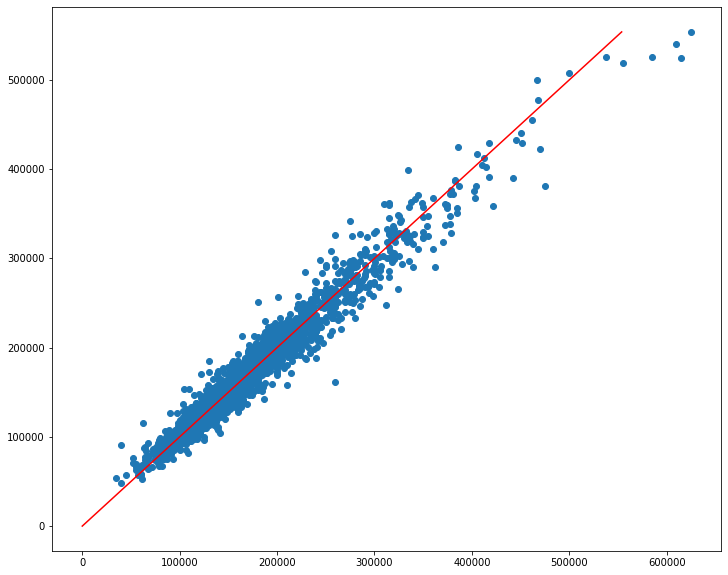

In [ ]:
plt.figure(figsize=(12,10));
plt.scatter(actual_outcomes, real_predicted_outcomes);
plt.plot([0, max(real_predicted_outcomes)],[0, max(real_predicted_outcomes)], c='red');

Determine optimal degree

In [ ]:
degrees = np.arange(.1, 1, .01)

percentage_error_loop = np.zeros(len(degrees))

for idx, degree in enumerate(degrees):
  
  nonlinear_outcomes = actual_outcomes.pow(degree)

  model_loop = sm.OLS(nonlinear_outcomes, train_numeric_one_hot).fit()
  predict_loop = model_loop.predict(train_numeric_one_hot)

  real_predicted_outcomes_loop = predict_loop.pow(1/degree)

  percentage_error_loop[idx] = root_mean_squared_percentage_error(actual_outcomes, real_predicted_outcomes_loop)

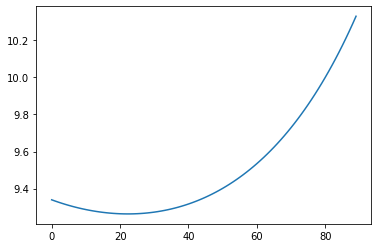

In [ ]:
plt.plot(percentage_error_loop)

In [ ]:
percentage_error_loop.argmin()/100  # Optimal degree

0.22

Incorporate optimal degree, showing ~ 1.1% improvement

9.280380378615785


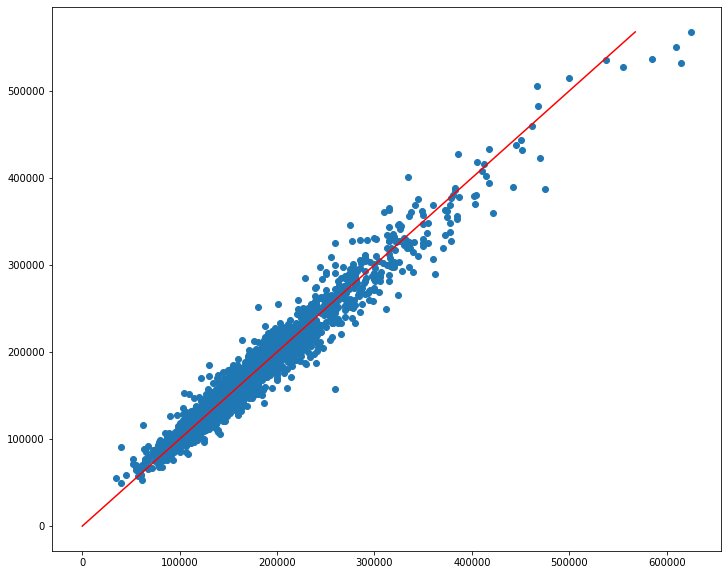

In [ ]:
degree = 0.22
nonlinear_outcomes = actual_outcomes.pow(degree)

model_one_hot = sm.OLS(nonlinear_outcomes, train_numeric_one_hot).fit()
predict_one_hot = model_one_hot.predict(train_numeric_one_hot)

real_predicted_outcomes = predict_one_hot.pow(1/degree)

print(root_mean_squared_percentage_error(actual_outcomes, real_predicted_outcomes))

plt.figure(figsize=(12,10));
plt.scatter(actual_outcomes, real_predicted_outcomes);
plt.plot([0, max(real_predicted_outcomes)],[0, max(real_predicted_outcomes)], c='red');

## Ridge Regression

In [ ]:
model_ridge = Ridge(alpha=0.001)
model_ridge.fit(train_numeric_one_hot, nonlinear_outcomes)
predict_ridge = model_ridge.predict(train_numeric_one_hot)
predict_ridge_df = pd.Series(predict_ridge)
real_predicted_ridge = predict_ridge_df.pow(1/degree)

root_mean_squared_percentage_error(actual_outcomes, real_predicted_ridge)

9.280396466561855

Final feature dataframe

In [ ]:
train_all_one_hot = pd.get_dummies(train_object)
train_ridge = pd.concat([train_numeric, train_all_one_hot], axis=1)
train_ridge.drop(['SalePrice'], axis=1, inplace=True)
train_ridge.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,...,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_No_Garage,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_No_Garage,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_No_Pool,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,Misc Feature_Gar2,Misc Feature_No_Misc,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Normal
0,62.0,14299,4,3,1964,1964,0.0,513.0,144.0,348.0,1005.0,1005,0,0,1005,1.0,0.0,1,0,3,1,5,0,2.0,440.0,0,0,0,0,0,0,0,7,2007,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,0.0,0.0,1296,0,0,1296,0.0,0.0,2,0,2,2,6,0,2.0,516.0,0,0,0,0,0,0,500,10,2006,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,50.0,9000,6,6,1937,1950,0.0,0.0,0.0,780.0,780.0,780,595,0,1375,0.0,0.0,1,1,3,1,6,1,1.0,544.0,0,162,0,0,126,0,0,12,2007,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,68.0,7379,8,5,2000,2000,0.0,484.0,0.0,491.0,975.0,975,873,0,1848,1.0,0.0,2,1,3,1,7,1,2.0,592.0,280,184,0,0,0,0,0,4,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,60.0,7200,7,9,1936,2007,0.0,350.0,210.0,0.0,560.0,575,560,0,1135,1.0,0.0,1,0,3,1,6,0,2.0,576.0,256,0,0,0,0,0,0,4,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
# Find optimal alpha

alpha_value = [1e-3, 1e-2, 3e-2, 6e-2, 1e-1, 3e-1, 6e-1, 1, 10]

percentage_error_ridge = np.zeros(len(alpha_value))

for idx, alpha_val in enumerate(alpha_value):
  ridgereg = Ridge(alpha=alpha_val)
  ridgereg.fit(train_ridge, nonlinear_outcomes)
  pred_ridge = pd.Series(ridgereg.predict(train_ridge))
  percentage_error_ridge[idx] = root_mean_squared_percentage_error(actual_outcomes, pred_ridge.pow(1/degree))

percentage_error_ridge

array([7.76328997, 7.76355308, 7.76463745, 7.76697171, 7.77067028,
       7.79099453, 7.82029866, 7.85531316, 8.19036564])

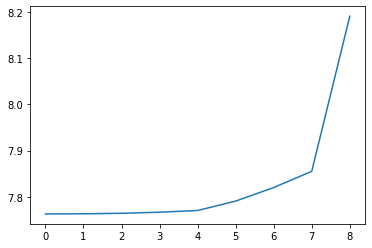

In [ ]:
# Select best alpha

best_alpha = 0.1

plt.plot(percentage_error_ridge)

In [ ]:
# Cross-validation

numLoops = 100
results  = np.zeros(numLoops)

for idx in range(numLoops):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(train_ridge, nonlinear_outcomes, test_size=0.20)
  model_ridge = Ridge(alpha = best_alpha)
  model_ridge.fit(X_train, y_train)
  pred_ridge = pd.Series(model_ridge.predict(X_test))
  results[idx] = root_mean_squared_percentage_error(y_test, pred_ridge)

print(results.mean())
print(results.std())

11.502636910935557
1.1444826029497646


In [ ]:
model_ridge = Ridge(alpha=0.001)
model_ridge.fit(train_numeric_one_hot, nonlinear_outcomes)
predict_ridge = model_ridge.predict(train_numeric_one_hot)
predict_ridge_df = pd.Series(predict_ridge)
real_predicted_ridge = predict_ridge_df.pow(1/degree)

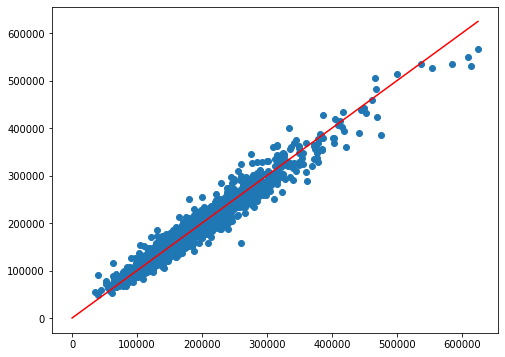

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(actual_outcomes, real_predicted_ridge);
plt.plot([0, max(actual_outcomes)], [0, max(actual_outcomes)], c='red');

## Data Visualizations

## Predicting Blind Test Data

In [ ]:
best_degree = 0.22
best_alpha = 0.1

final_actual_outcomes = train_clean['SalePrice'].copy()
final_nonlinear_outcomes = final_actual_outcomes.pow(degree)

final_numeric = train_numeric.drop(['SalePrice'], axis=1).copy()

final_category = train_object.copy()

final_all_features = pd.concat([final_numeric, final_category])

In [ ]:
final_one_hot = pd.get_dummies(final_category)
final_all_one_hot = pd.concat([final_numeric, final_one_hot], axis=1)
final_all_one_hot.shape

(2163, 316)

## Expected Prediction Accuracy

In [ ]:
# Cross-validation

numLoops = 100
results  = np.zeros(numLoops)

for idx in range(numLoops):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(final_all_one_hot, final_nonlinear_outcomes, test_size=0.20)
  model_ridge = Ridge(alpha = best_alpha)
  model_ridge.fit(X_train, y_train)
  pred_ridge = pd.Series(model_ridge.predict(X_test))
  results[idx] = root_mean_squared_percentage_error(y_test, pred_ridge)

print(results.mean())
print(results.std())

11.556727243090284
0.9994679566457769


(array([ 4.,  5., 19., 19., 14., 12., 11.,  8.,  6.,  2.]),
 array([ 9.5017448 ,  9.95356851, 10.40539223, 10.85721594, 11.30903965,
        11.76086336, 12.21268707, 12.66451079, 13.1163345 , 13.56815821,
        14.01998192]),
 <a list of 10 Patch objects>)

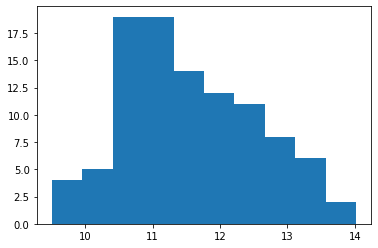

In [ ]:
plt.hist(results, bins=10)

Train final model with all data

In [ ]:
model_final = Ridge(alpha=best_alpha)
model_final.fit(final_all_one_hot, final_nonlinear_outcomes)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Load test data

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Data Science Student Material/Project 2 - Cohort 4/Data/Housing Data Blind Test.csv')
test_data.shape

(246, 79)

Adjust test data to match training set

In [ ]:
# Cast MS SubClass as String
test_data['MS SubClass'] = test_data['MS SubClass'].apply(str)

# Check Sale Condition for Normal label
print(test_data['Sale Condition'].value_counts())

# Check one_hot_encoding labels
test_data_numeric = test_data[final_numeric.columns]
test_data_category = test_data[final_category.columns]
test_category_one_hot = pd.get_dummies(test_data_category)
print('Examine test_category_one_hot.shape vs. final_one_hot.shape:', test_category_one_hot.shape, final_one_hot.shape)

Normal    246
Name: Sale Condition, dtype: int64
Examine test_category_one_hot.shape vs. final_one_hot.shape: (246, 228) (2163, 282)


We see there are missing labels (one_hot categories) in the test data, so adjust for the discrepancy.

In [ ]:
test_data_one_hot = pd.concat([test_data_numeric, test_category_one_hot], axis=1)

# Create new df with correct size/indexing
test_data_full = pd.DataFrame(0, index=np.arange(test_data.shape[0]), columns=final_all_one_hot.columns)
test_data_full.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,...,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_No_Garage,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_No_Garage,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_No_Pool,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,Misc Feature_Gar2,Misc Feature_No_Misc,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Normal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Form intersection of available test-one-hot columns with full data one-hot columns
column_intersect = final_all_one_hot.columns.intersection(test_data_one_hot.columns)
column_intersect.size

247

In [ ]:
# Fill new df with available test data/one-hot labels
test_data_full[column_intersect] = test_data_one_hot[column_intersect]

Predict test dataset

In [ ]:
predict_blind_test = pd.Series(model_final.predict(test_data_full))
predict_final = predict_blind_test.pow(1/best_degree)
predict_final

0      219190.981201
1      169135.947256
2      172633.179510
3      210170.632720
4      210190.975475
           ...      
241    345639.617973
242    177860.544424
243    501157.428143
244    149685.136502
245    199173.819152
Length: 246, dtype: float64

In [ ]:
# Write final predicted data to final_submission.csv

#predict_final.to_csv('/content/drive/MyDrive/Exercises - Ken/Project 2/final_submission.csv', index=False)

## Conclusions

- Data supports Regression approach
- Accuracy improvements with additional techniques
- Cross-validated accuracy 88.5%
- Model stable


## Next Steps

- Remove correlated numeric features to reduce feature set
- Use Lasso Regression for potential additional insight